In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')

In [2]:
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
seaborn.mpl.rcParams['font.family'] = 'serif'
seaborn.mpl.rcParams['font.size'] = 14

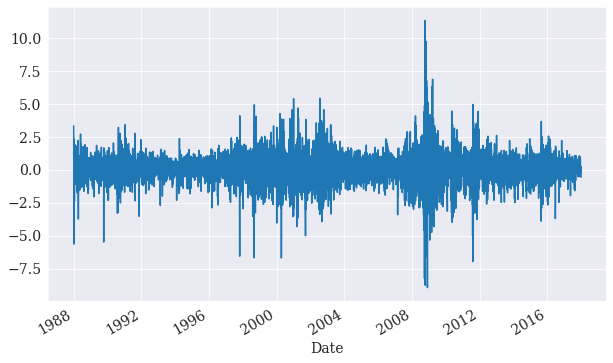

In [4]:
import datetime as dt
import pandas_datareader.data as web
st = dt.datetime(1988,1,1)
en = dt.datetime(2018,1,1)
data = web.get_data_famafrench('F-F_Research_Data_Factors_daily', start=st, end=en)
mkt_returns = data[0]['Mkt-RF'] +  data[0]['RF']
returns = mkt_returns
figure = returns.plot()

In [11]:
from arch import arch_model
am_G = arch_model(returns)
res_G = am_G.fit(update_freq=5)

print(res_G.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 9896.106554812635
Iteration:     10,   Func. Count:     65,   Neg. LLF: 9817.6438713272
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9817.643844215123
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -9817.64
Distribution:                  Normal   AIC:                           19643.3
Method:            Maximum Likelihood   BIC:                           19671.0
                                        No. Observations:                 7561
Date:                Thu, Nov 12 2020   Df Residuals:                     7557
Time:            

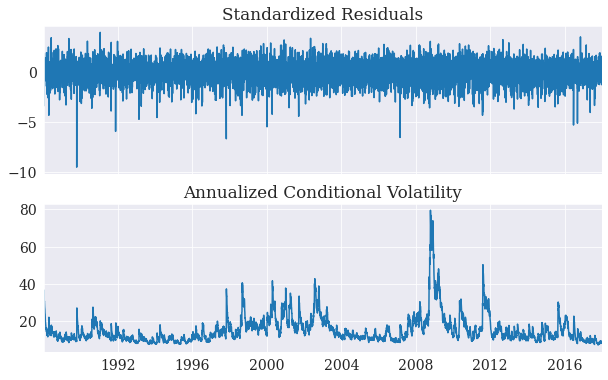

In [12]:
fig = res_G.plot(annualize='D')

In [21]:
res_G.std_resid

Date
1988-01-04    1.873564
1988-01-05    0.607074
1988-01-06    0.116342
1988-01-07    0.387679
1988-01-08   -3.367484
                ...   
2017-12-22   -0.244212
2017-12-26   -0.249766
2017-12-27   -0.027899
2017-12-28    0.300731
2017-12-29   -1.251085
Name: std_resid, Length: 7561, dtype: float64

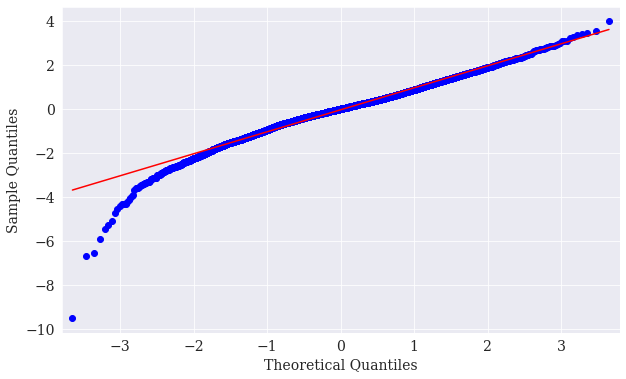

In [28]:
from statsmodels.graphics.gofplots import qqplot
qqfig = qqplot(res_G.std_resid, line='s')

In [13]:
am_T = arch_model(returns, p=1, o=1, q=1, power=1.0, dist='StudentsT')
res_T = am_T.fit(update_freq=5)
print(res_T.summary())

Iteration:      5,   Func. Count:     53,   Neg. LLF: 9531.94846721594
Iteration:     10,   Func. Count:     93,   Neg. LLF: 9510.518147359722
Iteration:     15,   Func. Count:    130,   Neg. LLF: 9505.792650502015
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9505.792650502015
            Iterations: 16
            Function evaluations: 136
            Gradient evaluations: 16
                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -9505.79
Distribution:      Standardized Student's t   AIC:                           19023.6
Method:                  Maximum Likelihood   BIC:                           19065.2
                                              No. Observations:  

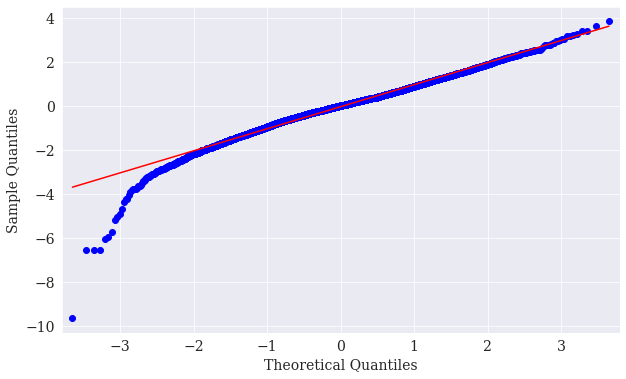

In [27]:
qqfig = qqplot(res_T.std_resid, line='s')